In [1]:
from neuron import h, gui
from matplotlib import pyplot as plt
from netpyne import specs, sim

NEURON: unable to open font "*helvetica-medium-r-normal*--14*", using "fixed"


In [2]:
netParams = specs.NetParams()   # object of class NetParams to store the network parameters
simConfig = specs.SimConfig()   # object of class SimConfig to store the simulation configuration

In [3]:
# Network parameters
PYR_Adex = {'secs': {}}
PYR_Adex['secs']['soma'] = {'geom': {}, 'pointps': {}}                        # soma params dict
PYR_Adex['secs']['soma']['geom'] = {'diam': 10.0, 'L': 10.0, 'cm': 31.831}    # soma geometry
PYR_Adex['secs']['soma']['pointps']['Adex'] = {
    'mod':'Adex2021b',
    'C': 200,
    'gl': 10,
    'E_l': -70,
    'V_thre': -50,
    'deltaT': 2, 
    'a': 2, 
    'tau_w':30, 
    'b':0,  
    'I_ext':1500, 
    'V_reset':-58}             # soma Izhikevich properties
netParams.cellParams['PYR_Adex'] = PYR_Adex                                  # add dict to list of cell parameters
netParams.popParams['S'] = {'cellType': 'PYR_Adex', 'numCells': 20}

In [4]:
simConfig.duration = 1*1e3 # Duration of the simulation, in ms
simConfig.dt = 0.025 # Internal integration timestep to use
simConfig.seeds = {'conn': 1, 'stim': 1, 'loc': 1} # Seeds for randomizers (connectivity, input stimulation and cell locations)
simConfig.createNEURONObj = True  # create HOC objects when instantiating network
simConfig.createPyStruct = True  # create Python structure (simulator-independent) when instantiating network
simConfig.timing = True  # show timing  and save to file
simConfig.verbose = True # show detailed messages

In [5]:
# Recording
simConfig.recordCells = [3]  # list of cells to record from
simConfig.recordTraces = {
    'V':{'sec':'soma','loc':0.5,'var':'v'},
    'w':{'sec':'soma','loc':0.5,'var':'w'},
}
simConfig.recordStim = True  # record spikes of cell stims
simConfig.recordStep = 0.025 # Step size in ms to save data (eg. V traces, LFP, etc)
# Analysis and plotting
simConfig.analysis['plotRaster'] = {'orderInverse': True} #True # Whether or not to plot a raster
simConfig.analysis['plotTraces'] = {'include': [1,51]} # plot recorded traces for this list of cells


Start time:  2021-07-19 21:20:34.986722

Creating network of 1 cell populations on 1 hosts...
Distributed population of 20 cells on 1 hosts: {0: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]}, next: 0
Cell 0/19 (gid=0) of pop S, on node 0, 
Cell 1/19 (gid=1) of pop S, on node 0, 
Cell 2/19 (gid=2) of pop S, on node 0, 
Cell 3/19 (gid=3) of pop S, on node 0, 
Cell 4/19 (gid=4) of pop S, on node 0, 
Cell 5/19 (gid=5) of pop S, on node 0, 
Cell 6/19 (gid=6) of pop S, on node 0, 
Cell 7/19 (gid=7) of pop S, on node 0, 
Cell 8/19 (gid=8) of pop S, on node 0, 
Cell 9/19 (gid=9) of pop S, on node 0, 
Cell 10/19 (gid=10) of pop S, on node 0, 
Cell 11/19 (gid=11) of pop S, on node 0, 
Cell 12/19 (gid=12) of pop S, on node 0, 
Cell 13/19 (gid=13) of pop S, on node 0, 
Cell 14/19 (gid=14) of pop S, on node 0, 
Cell 15/19 (gid=15) of pop S, on node 0, 
Cell 16/19 (gid=16) of pop S, on node 0, 
Cell 17/19 (gid=17) of pop S, on node 0, 
Cell 18/19 (gid=18) of pop S, on node

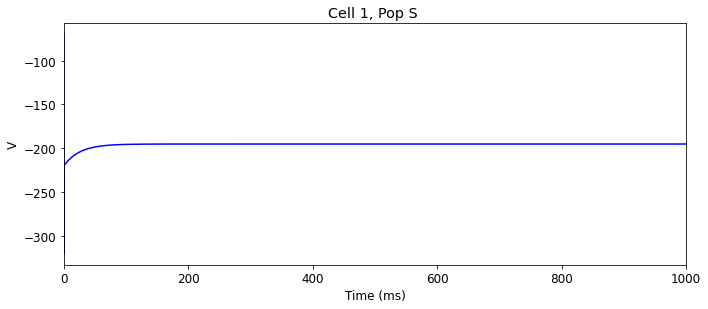

  Done; plotting time = 0.12 s

Total time = 0.25 s

End time:  2021-07-19 21:20:35.233818


In [7]:
# Create network and run simulation
sim.createSimulateAnalyze(netParams = netParams, simConfig = simConfig)